# <span style="font-family:Courier New; color:#CCCCCC">**Pràctica 3: CA & Heuristics**</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## <span style="font-family:Courier New; color:#336666">**Elementary CA with Wolfram Rules**</span>

In [12]:
class Wolfram_CA:

    def __init__(self, rule_number, state_len = 101):
        """
        Inicialització d'un autòmata cel·lular de Wolfram.
        
        :param rule_number: Nombre de la regla de Wolfram (entre 0 y 255).
        """
        self._state_len = state_len if state_len % 2 == 1 else state_len + 1 #forçem a que sigui imparell, per tenir un centre definit
        self._initial_state = np.zeros(self._state_len, dtype=int)
        self._initial_state[state_len // 2] = 1  # estat inicial amb una cel·la activa al centre de l'espai
        self._update_function = self._get_rule_function(rule_number)

    def _get_rule_function(self, rule_number):
        """
        Mètode per extreure la funció d'actualització correponent a la regla 'rule_number'.
        
        :param rule_number: Nombre de la regla de Wolfram (entre 0 y 255).
        """

        # Convertir el rule_number a una representació binària de 8 bits
        rule_binary = format(rule_number, '08b')

        def update_function(left, center, right):
            return int(rule_binary[7 - (left * 4 + center * 2 + right)])
        
        return update_function
    
    def simulate(self, num_steps):
        """
        Mètode per dur a terme una simulació de l'CA amb regla de Wolfram 'rule_number'.

        :param num_steps: Nombre de generacions de l'autòmata, o bé el temps de simulació
        :return: Llista d'estats de l'autòmata cel·lular al llarg de les generacions.
        """

        states = np.zeros((num_steps, self._state_len), dtype=int)
        # Configurar l'estat inicial
        states[0, :] = self._initial_state

        for step in range(1, num_steps):
            for i in range(self._state_len):
            
                left = states[step - 1, (i - 1) % self._state_len]
                center = states[step - 1, i]
                right = states[step - 1, (i + 1) % self._state_len]
                # Regla de Wolfram
                states[step, i] = self._update_function(left, center, right)
    
        return states

In [13]:
def plot_automaton(states):
    """
    Visualiza l'autòmata cel·lular al llarg de las generaciones.
    
    :param states: Llista d'estats de l'autòmata cel·lular.
    """
    plt.figure(figsize=(10, 6))
    plt.imshow(states, cmap='binary', interpolation='nearest')
    plt.xlabel('Cell')
    plt.ylabel('Generació')
    plt.show()

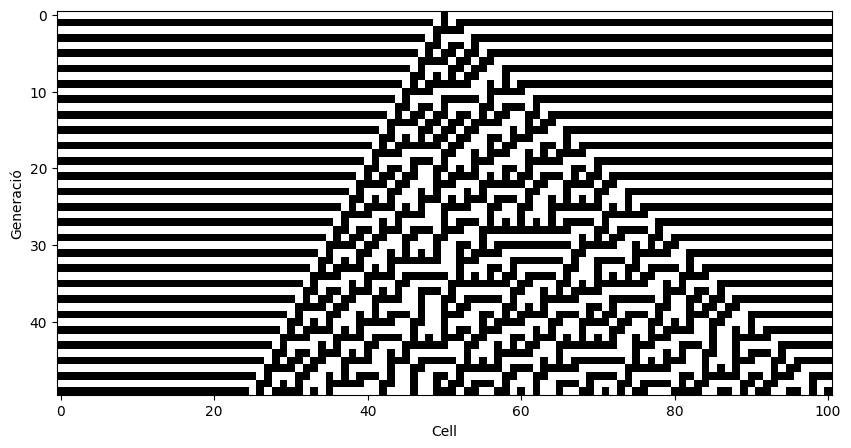

In [14]:
#Exemple d'ús
CA_45 = Wolfram_CA(rule_number=45)
states = CA_45.simulate(num_steps=50)

plot_automaton(states)

### <span style="font-family:Courier New; color:#336633">**Multilayer Wolfram's CA**</span>

In [20]:
class Multilayer_Wolfram_CA:

    def __init__(self, layers_rules, state_len = 101, comb_f = np.bitwise_and.reduce):
        """
        Inicialització d'un autòmata cel·lular multicapa de Wolfram -> len(layers_rules): 1-AC.
        
        :param layers_rules: Llista amb els nombres de les regles de Wolfram (entre 0 y 255) de cada capa.
        :param comb_f: funció de combinació dels estats de cada capa.
        """
        self._m = len(layers_rules)
        self._CAs = [Wolfram_CA(rule_number, state_len = state_len) for rule_number in layers_rules]
        self._comb_f = comb_f

    def simulate(self, num_steps):
        """
        Mètode per dur a terme una simulació de l'CA amb regla de Wolfram 'rule_number'.

        :param num_steps: Nombre de generacions de l'autòmata, o bé el temps de simulació
        :return: Llista d'estats de l'autòmata cel·lular al llarg de les generacions.
        """

        states = [wolfram_CA.simulate(num_steps) for wolfram_CA in self._CAs]
        comb = self._comb_f(states)
        
        return comb

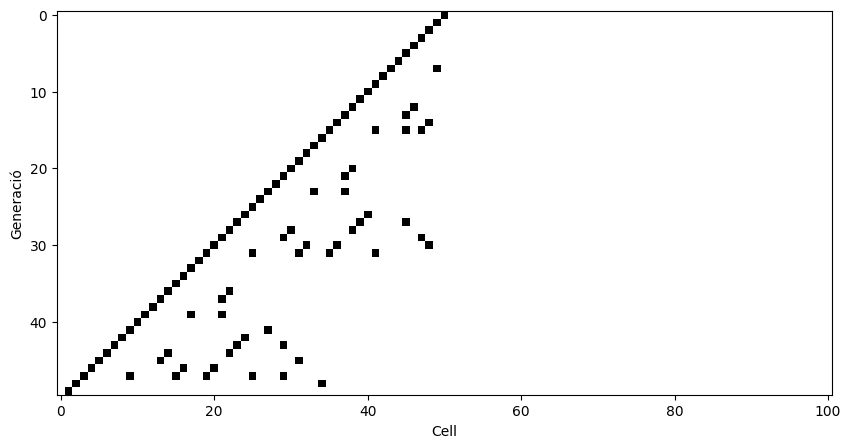

In [37]:
multilayer_CA = Multilayer_Wolfram_CA([30, 90, 110], state_len=101, comb_f=np.bitwise_and.reduce)
final_states = multilayer_CA.simulate(num_steps=50)
plot_automaton(final_states)